In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/2)%20Classification%20Models/Decision%20Trees%20Classification/gym_members_exercise_tracking.csv"

--2024-12-11 15:18:18--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/2)%20Classification%20Models/Decision%20Trees%20Classification/gym_members_exercise_tracking.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65136 (64K) [text/plain]
Saving to: ‘gym_members_exercise_tracking.csv’

gym_members_exercis 100%[===================>]  63.61K  --.-KB/s    in 0.01s   

2024-12-11 15:18:19 (5.14 MB/s) - ‘gym_members_exercise_tracking.csv’ saved [65136/65136]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('/content/gym_members_exercise_tracking.csv')

In [4]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

<ipython-input-6-f263f311684d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Experience_Level', data=data, palette='viridis')


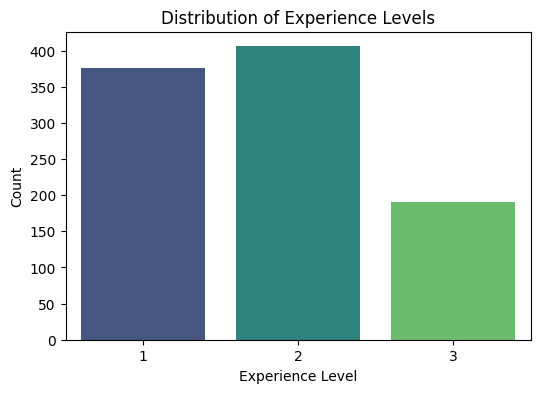

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Experience_Level', data=data, palette='viridis')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

In [7]:
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                      'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
                      'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']


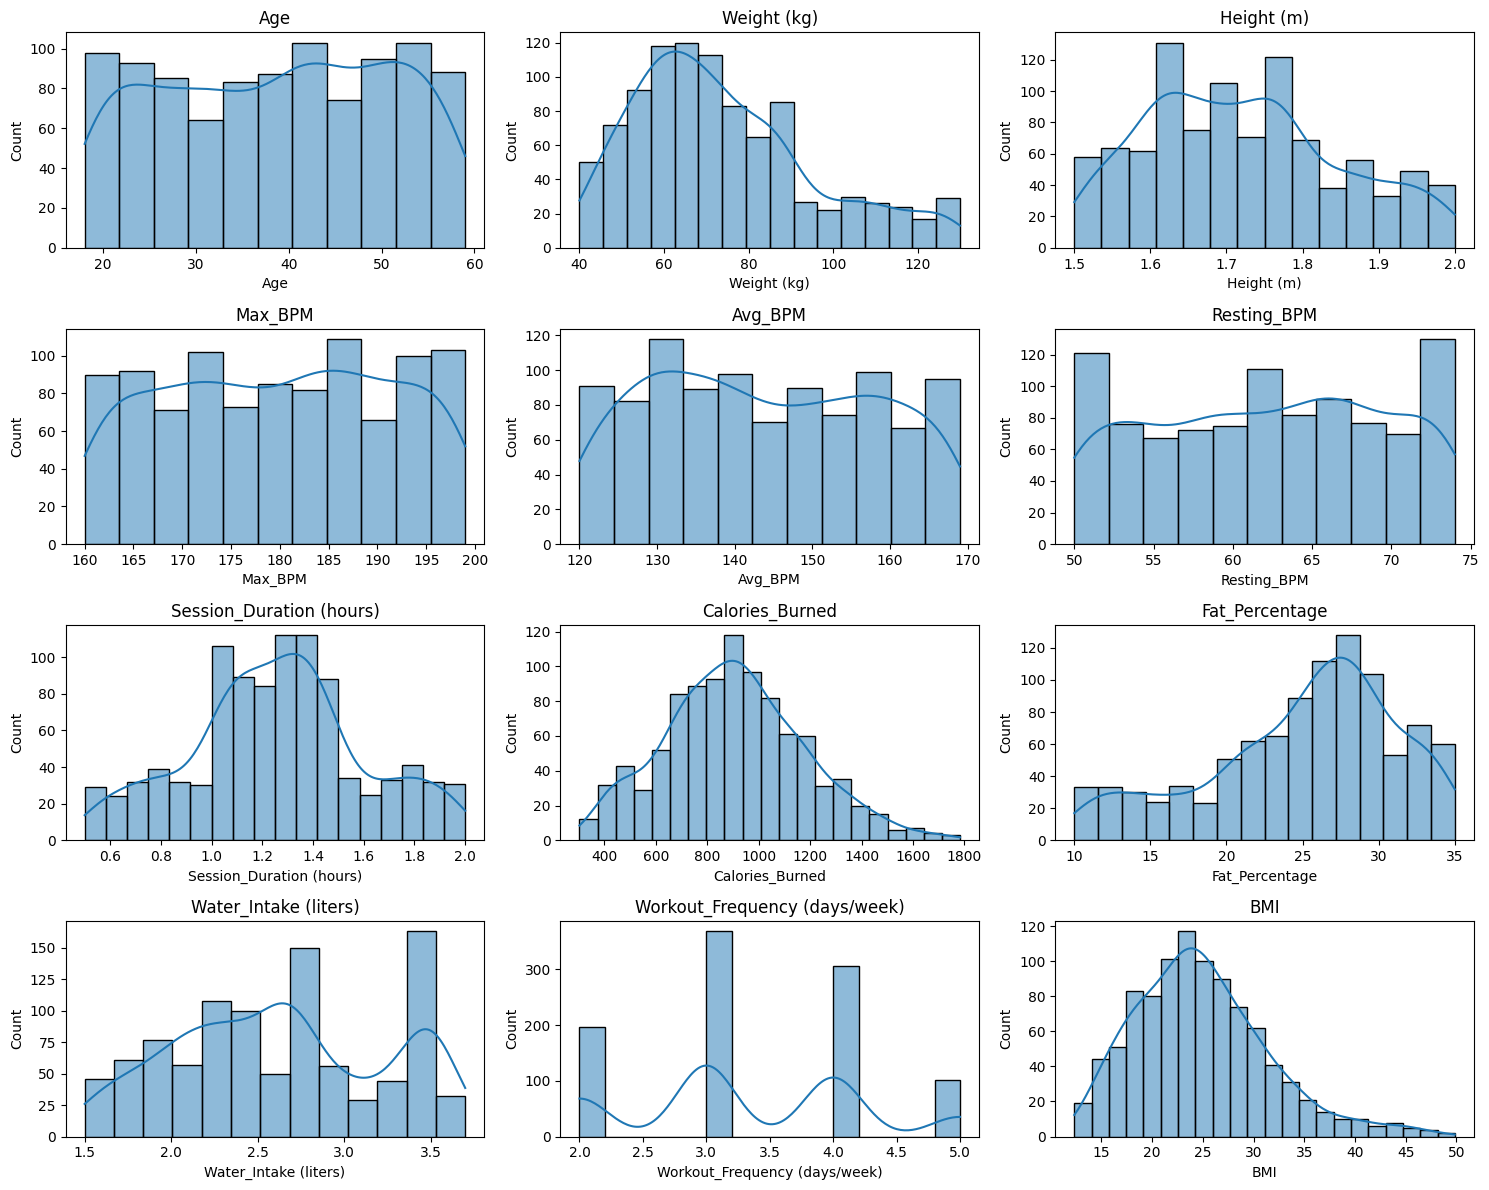

In [8]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [9]:
skewed_features = ['Weight (kg)', 'Session_Duration (hours)', 'Calories_Burned']
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

In [10]:
categorical_cols = ['Gender', 'Workout_Type']
numerical_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                  'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
                  'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

In [11]:
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

In [12]:
pipeline = imbPipeline(steps=[
    ('preprocessor', encoder),
    ('smote', SMOTE(random_state = 42)),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42))
])

In [13]:
X = data[categorical_cols + numerical_cols]
y = data['Experience_Level']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Workout_Type'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [16]:
y_pred = pipeline.predict(X_test)

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        75
           2       0.85      1.00      0.92        82
           3       1.00      1.00      1.00        38

    accuracy                           0.92       195
   macro avg       0.95      0.93      0.94       195
weighted avg       0.93      0.92      0.92       195

Confusion Matrix:
[[60 15  0]
 [ 0 82  0]
 [ 0  0 38]]
Accuracy: 0.92


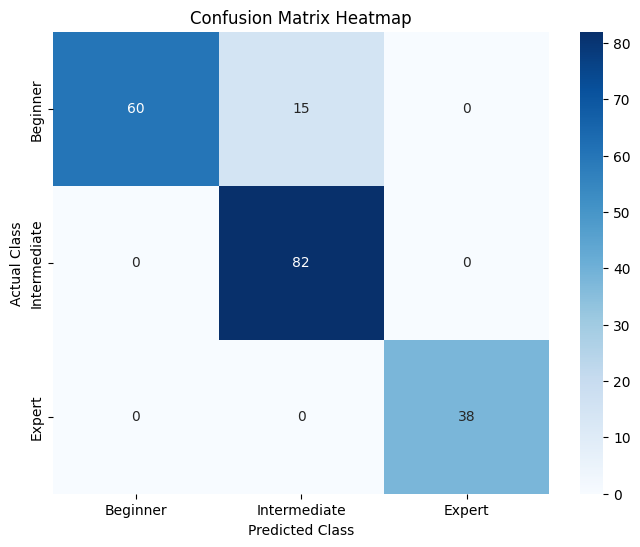

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Beginner', 'Intermediate', 'Expert'], yticklabels=['Beginner', 'Intermediate', 'Expert'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()